In [1]:
import numpy as np

In [2]:
# Prediction
predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
# Actual
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
def gini(actual, pred):
    assert(len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1*all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [5]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_normalized(actual, predictions)

print("Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f" % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


In [6]:
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print("Sorted Actual Values", sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [7]:
from matplotlib import pyplot as plt

In [27]:
cumsum_sorted_actual = np.cumsum(sorted_actual)
cumsum_sorted_index = np.arange(1, len(cumsum_sorted_actual)+1)
print("Cumsum of Sorted Actual Values", cumsum_sorted_actual)

Cumsum of Sorted Actual Values [0 0 0 0 1 1 1 1 2 3 3 4 4 5 6]


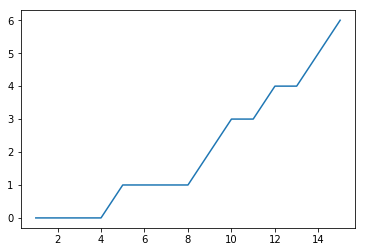

In [28]:
plt.plot(cumsum_sorted_index, cumsum_sorted_actual)

Normalized Cumsum of Sorted Actual Values [ 0.          0.          0.          0.          0.16666667  0.16666667
  0.16666667  0.16666667  0.33333333  0.5         0.5         0.66666667
  0.66666667  0.83333333  1.        ]
Normalized Cumsum of Sorted Index Values [ 0.06666667  0.13333333  0.2         0.26666667  0.33333333  0.4
  0.46666667  0.53333333  0.6         0.66666667  0.73333333  0.8
  0.86666667  0.93333333  1.        ]


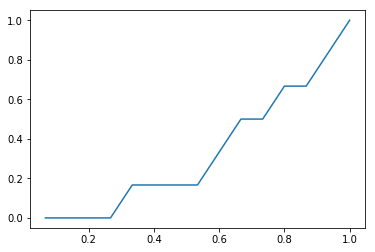

In [38]:
n_cumsum_sorted_actual = cumsum_sorted_actual / np.max(cumsum_sorted_actual)
n_cumsum_sorted_index = cumsum_sorted_index / len(cumsum_sorted_index)
print("Normalized Cumsum of Sorted Actual Values", n_cumsum_sorted_actual)
print("Normalized Cumsum of Sorted Index Values", n_cumsum_sorted_index)
plt.plot(n_cumsum_sorted_index, n_cumsum_sorted_actual)

Normalized Cumsum of Sorted Actual Values [0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.33333333333333331, 0.5, 0.5, 0.66666666666666663, 0.66666666666666663, 0.83333333333333337, 1.0]
Normalized Cumsum of Sorted Index Values [0, 0.066666666666666666, 0.13333333333333333, 0.20000000000000001, 0.26666666666666666, 0.33333333333333331, 0.40000000000000002, 0.46666666666666667, 0.53333333333333333, 0.59999999999999998, 0.66666666666666663, 0.73333333333333328, 0.80000000000000004, 0.8666666666666667, 0.93333333333333335, 1.0]


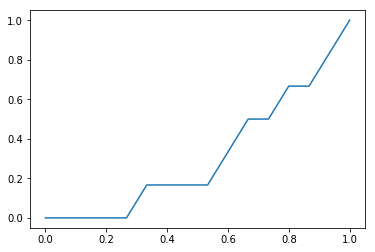

In [39]:
n_cumsum_sorted_actual = [0] + list(n_cumsum_sorted_actual)
n_cumsum_sorted_index = [0] + list(n_cumsum_sorted_index)
print("Normalized Cumsum of Sorted Actual Values", n_cumsum_sorted_actual)
print("Normalized Cumsum of Sorted Index Values", n_cumsum_sorted_index)
plt.plot(n_cumsum_sorted_index, n_cumsum_sorted_actual)

Text(0, 0.5, 'Cumulative Share of Actual Values')

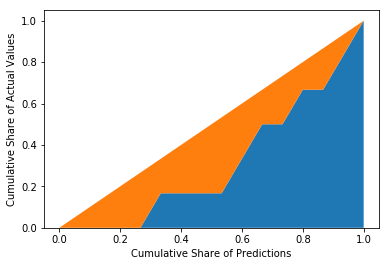

In [42]:
# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(n_cumsum_sorted_index, n_cumsum_sorted_actual)]

plt.stackplot(n_cumsum_sorted_index, n_cumsum_sorted_actual, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')

In [52]:
from scipy import interpolate
fy = scipy.interpolate.interp1d(n_cumsum_sorted_index, n_cumsum_sorted_actual)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=n_cumsum_sorted_index)
actual_orange_area = 0.5 - blue_area
print('Actual Orange Area: %.3f' % actual_orange_area)

Actual Orange Area: 0.189


Normalized Cumsum of Sorted Perfect Values [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333337, 1.0]


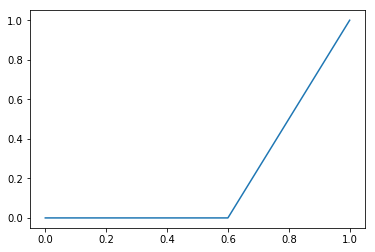

In [47]:
cumsum_sorted_perfect = np.cumsum(sorted(sorted_actual)) / sum(sorted_actual)
n_cumsum_sorted_perfect = cumsum_sorted_perfect / np.max(cumsum_sorted_perfect)
n_cumsum_sorted_perfect = [0] + list(n_cumsum_sorted_perfect)
print("Normalized Cumsum of Sorted Perfect Values", n_cumsum_sorted_perfect)
plt.plot(n_cumsum_sorted_index, n_cumsum_sorted_perfect)

Text(0, 0.5, 'Cumulative Share of Perfect Values')

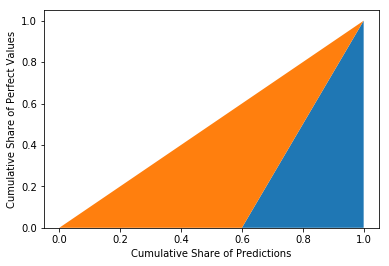

In [48]:
# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(n_cumsum_sorted_index, n_cumsum_sorted_perfect)]

plt.stackplot(n_cumsum_sorted_index, n_cumsum_sorted_perfect, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Perfect Values')

In [51]:
from scipy import interpolate
fy = scipy.interpolate.interp1d(n_cumsum_sorted_index, n_cumsum_sorted_perfect)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=n_cumsum_sorted_index)
perfect_orange_area = 0.5 - blue_area
print('Perfect Orange Area: %.3f' % perfect_orange_area)

Perfect Orange Area: 0.300


In [54]:
NGini = actual_orange_area / perfect_orange_area
print("Normalized Gini %.3f" % NGini)

Normalized Gini 0.630
